In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data1 = pd.read_csv("Austin_Animal_Center_Intakes.csv")
data2 = pd.read_csv("Austin_Animal_Center_Outcomes.csv")

In [4]:
data1.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [5]:
data2.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [6]:
print(data1.shape)
print(data2.shape)

(154997, 12)
(154993, 12)


In [7]:
# Find the number of common Animal ID values
common_animal_ids = set(data1['Animal ID']).intersection(set(data2['Animal ID']))
num_common_ids = len(common_animal_ids)
print(num_common_ids)

138163


In [8]:
# Merge the datasets based on Animal ID, Name, Breed, and Color
dataset = pd.merge(data1, data2, on=['Animal ID', 'Name', 'Breed', 'Color'], how='inner')
print(dataset.head())

  Animal ID          Name              DateTime_x   MonthYear_x  \
0   A786884        *Brock  01/03/2019 04:19:00 PM  January 2019   
1   A706918         Belle  07/05/2015 12:59:00 PM     July 2015   
2   A724273       Runster  04/14/2016 06:43:00 PM    April 2016   
3   A857105  Johnny Ringo  05/12/2022 12:23:00 AM      May 2022   
4   A682524           Rio  06/29/2014 10:38:00 AM     June 2014   

                        Found Location    Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)          Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)          Stray           Normal   
2   2818 Palomino Trail in Austin (TX)          Stray           Normal   
3   4404 Sarasota Drive in Austin (TX)  Public Assist           Normal   
4        800 Grove Blvd in Austin (TX)          Stray           Normal   

  Animal Type_x Sex upon Intake Age upon Intake  \
0           Dog   Neutered Male         2 years   
1           Dog   Spayed Female         8 years   

In [9]:
# Create empty lists to store unique values for each column
unique_locations = dataset['Found Location'].unique().tolist()
unique_intake_types = dataset['Intake Type'].unique().tolist()
unique_intake_conditions = dataset['Intake Condition'].unique().tolist()
unique_animal_types = dataset['Animal Type_x'].unique().tolist()
unique_breeds = dataset['Breed'].unique().tolist()
unique_colors = dataset['Color'].unique().tolist()
unique_outcome_types = dataset['Outcome Type'].unique().tolist()
unique_sex_types = dataset['Sex upon Intake'].unique().tolist()

# Print the unique values
# print("Unique Found Locations:", unique_locations)
print("Unique Intake Types:", unique_intake_types)
print("Unique Intake Conditions:", unique_intake_conditions)
print("Unique Animal Types:", unique_animal_types)
print("Unique Breeds:", unique_breeds)
print("Unique Colors:", unique_colors)
print("Unique Outcome Types:", unique_outcome_types)
print("Unique Sex Types:", unique_sex_types)

Unique Intake Types: ['Stray', 'Public Assist', 'Owner Surrender', 'Wildlife', 'Euthanasia Request', 'Abandoned']
Unique Intake Conditions: ['Normal', 'Injured', 'Pregnant', 'Nursing', 'Aged', 'Sick', 'Medical', 'Unknown', 'Congenital', 'Other', 'Behavior', 'Neonatal', 'Feral', 'Med Urgent', 'Med Attn', 'Space', 'Agonal', 'Neurologic', 'Panleuk', 'Parvo']
Unique Animal Types: ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']
Unique Breeds: ['Beagle Mix', 'English Springer Spaniel', 'Basenji Mix', 'Domestic Shorthair', 'Doberman Pinsch/Australian Cattle Dog', 'Labrador Retriever Mix', 'Great Dane Mix', 'Domestic Shorthair Mix', 'Pit Bull', 'Chihuahua Shorthair', 'Queensland Heeler Mix', 'Australian Cattle Dog/Labrador Retriever', 'Parson Russell Terrier Mix', 'Bat', 'Beagle', 'Maltese Mix', 'Bat Mix', 'Dachshund Mix', 'Norfolk Terrier', 'Yorkshire Terrier Mix', 'Rottweiler Mix', 'Siberian Husky', 'Pit Bull Mix', 'Tibetan Spaniel Mix', 'Miniature Pinscher Mix', 'Hamster Mix', 'Maltese', 'Dach

In [10]:
unique_value_counts = {
    "Found Locations": len(unique_locations),
    "Intake Types": len(unique_intake_types),
    "Intake Conditions": len(unique_intake_conditions),
    "Animal Types": len(unique_animal_types),
    "Breeds": len(unique_breeds),
    "Colors": len(unique_colors),
    "Outcome Types": len(unique_outcome_types)
}

# Print the unique values and their counts
for key, value in unique_value_counts.items():
    print(f"Unique {key} ({value} unique values):")
    print(unique_value_counts[key])
    print()

Unique Found Locations (63540 unique values):
63540

Unique Intake Types (6 unique values):
6

Unique Intake Conditions (20 unique values):
20

Unique Animal Types (5 unique values):
5

Unique Breeds (2861 unique values):
2861

Unique Colors (629 unique values):
629

Unique Outcome Types (11 unique values):
11



In [11]:
# Group the dataset by 'Animal Type' and aggregate unique values of 'Breed' and 'Color'
unique_values_by_animal_type = dataset.groupby('Animal Type_x')['Breed', 'Color'].agg(lambda x: x.unique().tolist()).reset_index()

# Display the result
unique_values_by_animal_type

<ipython-input-11-6c76c356f607>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unique_values_by_animal_type = dataset.groupby('Animal Type_x')['Breed', 'Color'].agg(lambda x: x.unique().tolist()).reset_index()


,Animal Type_x,Breed,Color
0,Bird,"[Hawk, Waxwing Mix, Pigeon Mix, Cockatiel, Chi...","[Brown/Yellow, Gray/Yellow, Brown, White/Yello..."
1,Cat,"[Domestic Shorthair, Domestic Shorthair Mix, D...","[Orange Tabby, Brown Tabby, Cream Tabby, Black..."
2,Dog,"[Beagle Mix, English Springer Spaniel, Basenji...","[Tricolor, White/Liver, Sable/White, Tan/Gray,..."
3,Livestock,"[Potbelly Pig, Pig, Pig Mix, Goat, Potbelly Pi...","[White/Black, White, Black/White, Gray/Black, ..."
4,Other,"[Bat, Bat Mix, Hamster Mix, Raccoon Mix, Racco...","[Brown, White/Gray, Brown/Black, Gray/Black, W..."


In [12]:
# Group the dataset by 'Animal Type_x' and count the unique values of 'Breed' and 'Color'
unique_value_counts_by_animal_type_x = dataset.groupby('Animal Type_x')['Breed', 'Color'].agg(lambda x: len(x.unique())).reset_index()

# Display the result
print(unique_value_counts_by_animal_type_x)


<ipython-input-12-a613712a25ba>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unique_value_counts_by_animal_type_x = dataset.groupby('Animal Type_x')['Breed', 'Color'].agg(lambda x: len(x.unique())).reset_index()


  Animal Type_x  Breed  Color
0          Bird     86     97
1           Cat    107    306
2           Dog   2531    391
3     Livestock      8     11
4         Other    131    149


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198622 entries, 0 to 198621
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         198622 non-null  object
 1   Name              153120 non-null  object
 2   DateTime_x        198622 non-null  object
 3   MonthYear_x       198622 non-null  object
 4   Found Location    198622 non-null  object
 5   Intake Type       198622 non-null  object
 6   Intake Condition  198622 non-null  object
 7   Animal Type_x     198622 non-null  object
 8   Sex upon Intake   198620 non-null  object
 9   Age upon Intake   198621 non-null  object
 10  Breed             198622 non-null  object
 11  Color             198622 non-null  object
 12  DateTime_y        198622 non-null  object
 13  MonthYear_y       198622 non-null  object
 14  Date of Birth     198622 non-null  object
 15  Outcome Type      198580 non-null  object
 16  Outcome Subtype   78420 non-null   obj

In [14]:
dataset.shape

(198622, 20)

In [15]:
dataset = dataset.drop(['Outcome Subtype'],axis = 1)

In [16]:
# Find the number of duplicate records in the dataset
num_duplicates = dataset.duplicated().sum()

# Print the number of duplicate records
print("Number of Duplicate Records:", num_duplicates)

dataset = dataset.drop_duplicates()

Number of Duplicate Records: 97


In [17]:
# size after removing the duplicates
dataset.shape

(198525, 19)

In [18]:
import pandas as pd

# Create a new dataframe to store the values for recurring Animal IDs
recurring_animal_data = pd.DataFrame()

# Find recurring Animal IDs
recurring_animal_ids = dataset[dataset['Animal ID'].duplicated(keep=False)]['Animal ID'].unique()

# Create a list to store dataframes for each recurring Animal ID
dataframes = []

# Iterate through each recurring Animal ID
for animal_id in recurring_animal_ids:
    animal_data = dataset[dataset['Animal ID'] == animal_id]

    # Append the data for this Animal ID to the list of dataframes
    dataframes.append(animal_data[['Animal ID', 'Found Location', 'Intake Type', 'Intake Condition', 'Age upon Intake', 'Breed', 'Outcome Type']])

# Concatenate the list of dataframes into the final dataframe
recurring_animal_data = pd.concat(dataframes, ignore_index=True)

# Now, recurring_animal_data contains the specified attributes for each recurring Animal ID


In [19]:
print(recurring_animal_data)

      Animal ID                              Found Location      Intake Type  \
0       A731435                                 Austin (TX)  Owner Surrender   
1       A731435                                 Austin (TX)  Owner Surrender   
2       A731435  Blue Goose Rd And Giles Lna in Austin (TX)            Stray   
3       A731435  Blue Goose Rd And Giles Lna in Austin (TX)            Stray   
4       A726659               Twilight Trail in Travis (TX)            Stray   
...         ...                                         ...              ...   
72700   A881741                        Outside Jurisdiction  Owner Surrender   
72701   A881465        13901 Lyndon B Johnson in Manor (TX)            Stray   
72702   A881465        13901 Lyndon B Johnson in Manor (TX)            Stray   
72703   A881465       1156 West Cesar Chavez in Austin (TX)            Stray   
72704   A881465       1156 West Cesar Chavez in Austin (TX)            Stray   

      Intake Condition Age upon Intake 

In [20]:
recurring_data_csv = recurring_animal_data.to_csv('recurring_animal_data.csv',index = False)

In [21]:
# Q.1 Number of unique breeds in the "Animal Type" column

# Group the dataset by 'Animal Type_x' and calculate the number of unique breeds for each group
unique_breeds_by_animal_type = dataset.groupby('Animal Type_x')['Breed'].nunique().reset_index()

# Rename the columns for clarity
unique_breeds_by_animal_type.columns = ['Animal Type_x', 'Number of Unique Breeds']

# Display the result
print(unique_breeds_by_animal_type)

  Animal Type_x  Number of Unique Breeds
0          Bird                       86
1           Cat                      107
2           Dog                     2531
3     Livestock                        8
4         Other                      131


In [22]:
# Calculate the count of records for each unique animal type
count_of_records_by_animal_type = dataset['Animal Type_x'].value_counts().reset_index()
count_of_records_by_animal_type.columns = ['Animal Type_x', 'Count of Records']

# Display the result
print(count_of_records_by_animal_type)

  Animal Type_x  Count of Records
0           Dog            123900
1           Cat             65599
2         Other              8228
3          Bird               772
4     Livestock                26


Answer: By this we can conclude that the most number of pets are of dog species in Austin, Texas.

In [23]:
# Q.2 How does the 'Animal Type' relate to different 'Outcome Types'?

# Create a cross-tabulation (contingency table) of 'Animal Type' vs 'Outcome Type'
cross_tab = pd.crosstab(dataset['Animal Type_x'], dataset['Outcome Type'])

# Display the cross-tabulation
cross_tab

Outcome Type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer
Animal Type_x,,,,,,,,,,
Bird,266,29,32,139,1,10,54,0,0,240
Cat,33527,868,111,2359,48,6,3202,262,0,25208
Dog,59837,376,75,2373,56,0,37401,1660,12,22083
Livestock,12,1,0,2,0,0,6,0,0,5
Other,890,223,522,5435,5,10,71,3,0,1064


In [24]:
# Create a cross-tabulation (contingency table) of 'Animal Type' vs 'Outcome Type'
cross_tab = pd.crosstab(dataset['Animal Type_x'], dataset['Outcome Type'])

# Calculate the percentages along each row (axis=1)
percentage_table = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Display the percentage table
percentage_table

Outcome Type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer
Animal Type_x,,,,,,,,,,
Bird,34.500649,3.761349,4.150454,18.028534,0.129702,1.297017,7.003891,0.000000,0.000000,31.128405
Cat,51.115244,1.323352,0.169231,3.596530,0.073181,0.009148,4.881767,0.399445,0.000000,38.432102
Dog,48.305119,0.303537,0.060546,1.915672,0.045208,0.000000,30.193020,1.340082,0.009687,17.827129
Livestock,46.153846,3.846154,0.000000,7.692308,0.000000,0.000000,23.076923,0.000000,0.000000,19.230769
Other,10.823300,2.711906,6.348048,66.095099,0.060805,0.121610,0.863432,0.036483,0.000000,12.939317


Answer:
1. Cats and Dogs have higher adoption rates than other animals
2. Significant portion of cats and dogs are transfereed
3. Dogs have the highest percentage of being returned to the owner

In [25]:
# Q.3 Are there any patterns or seasonality in animal intakes and outcomes over time?

dataset['DateTime_x'] = pd.to_datetime(dataset['DateTime_x'])
dataset['DateTime_y'] = pd.to_datetime(dataset['DateTime_y'])

dataset['Month_x'] = dataset['DateTime_x'].dt.month
dataset['Month_y'] = dataset['DateTime_y'].dt.month


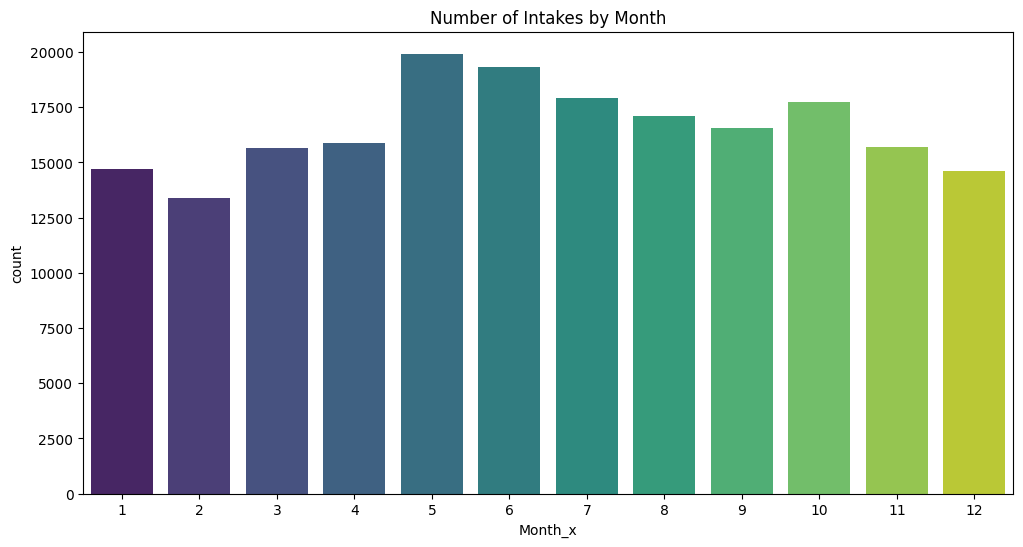

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of intakes per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month_x', data=dataset, palette='viridis')
plt.title('Number of Intakes by Month')
plt.show()


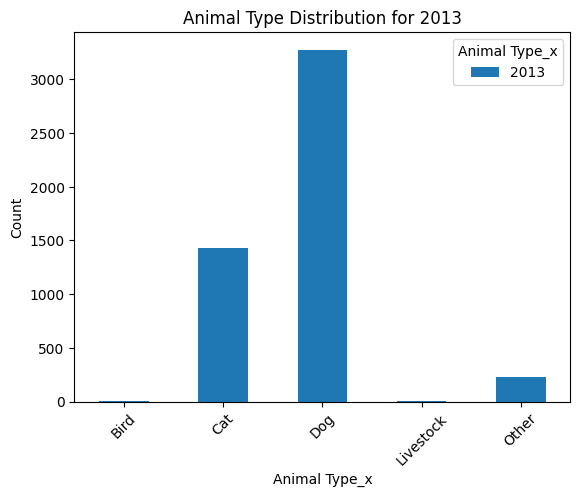

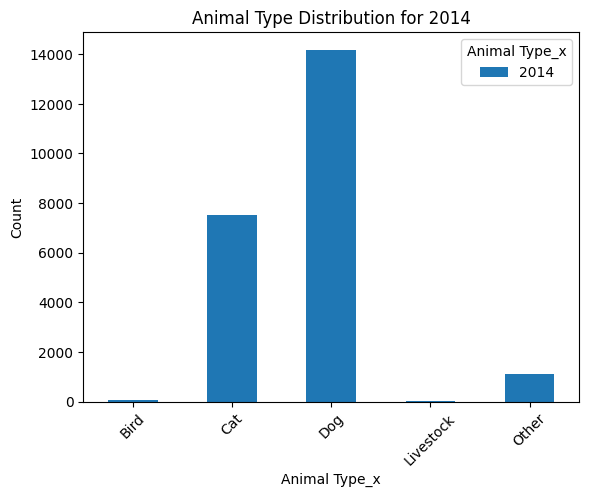

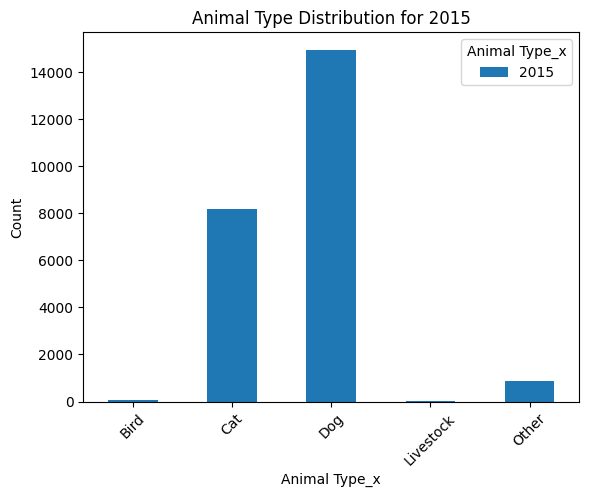

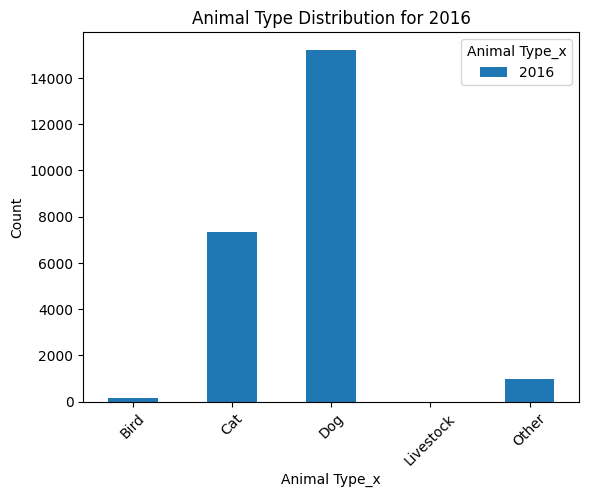

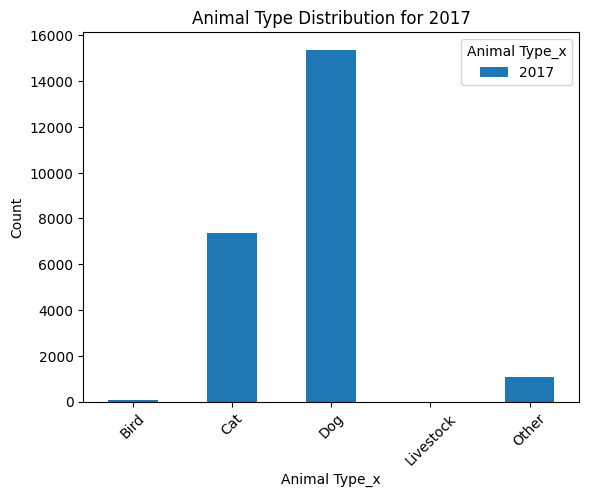

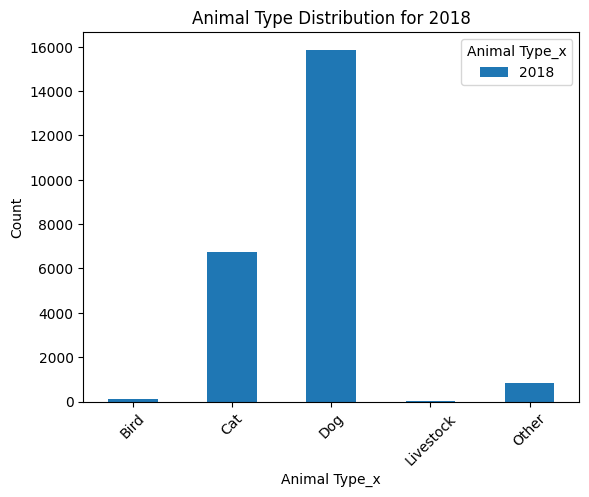

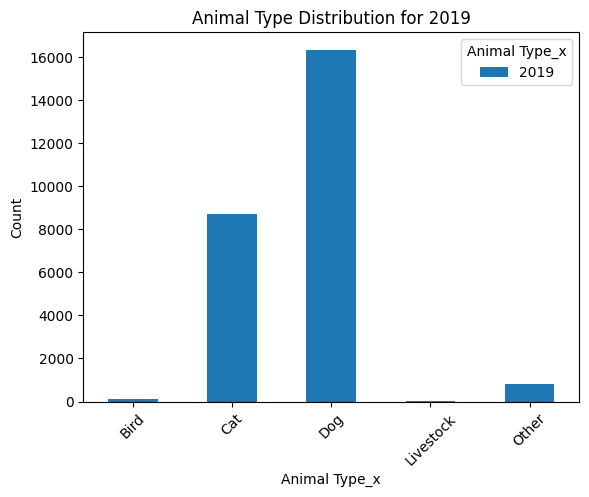

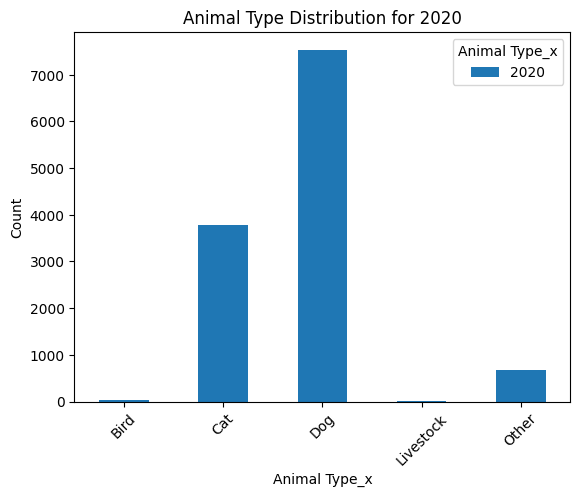

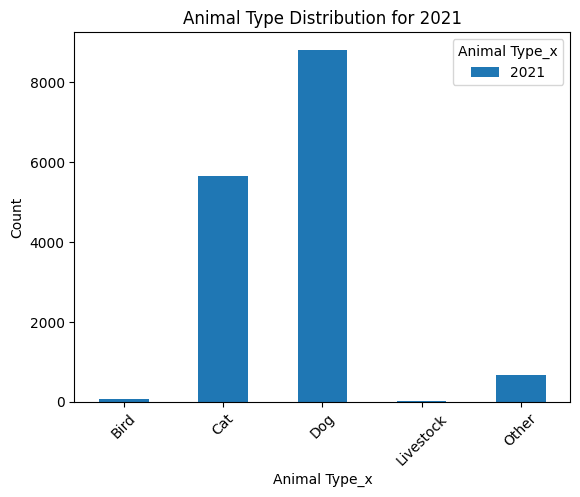

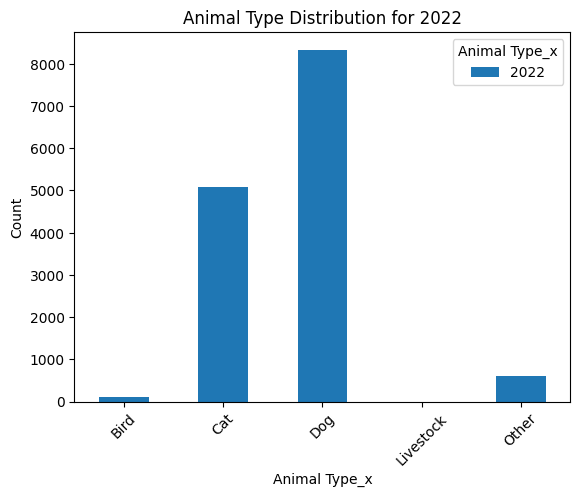

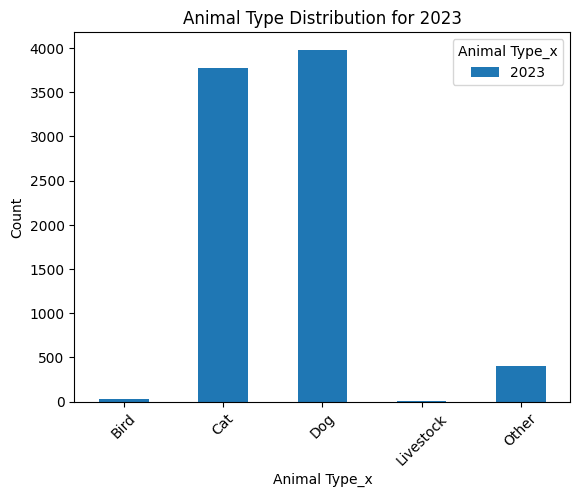

In [27]:
dataset['MonthYear_x'] = pd.to_datetime(dataset['MonthYear_x'], format='%B %Y')

# Step 2: Extract the year
dataset['Year'] = dataset['MonthYear_x'].dt.year

# Step 3: Group by year and 'Animal Type_x' and count
yearly_animal_counts = dataset.groupby(['Year', 'Animal Type_x']).size().unstack().fillna(0)

# Step 4: Create separate graphs for each year
for year in yearly_animal_counts.index:
    data = yearly_animal_counts.loc[year]
    data.plot(kind='bar', stacked=True, title=f'Animal Type Distribution for {year}')
    plt.xlabel('Animal Type_x')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Animal Type_x')
    plt.show()

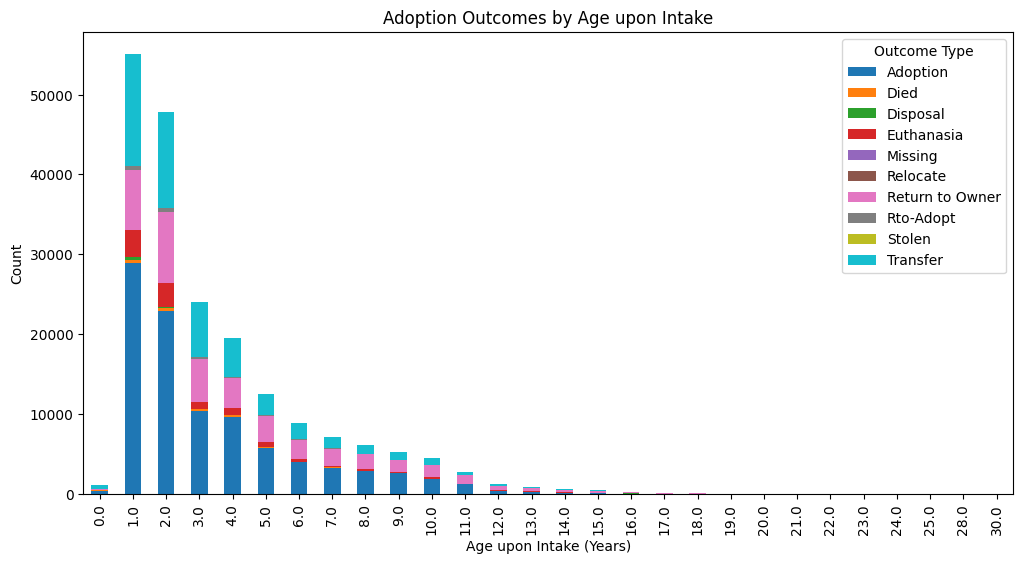

In [28]:
# Q.4 How does age potentially influence adoption outcomes?

dataset['Age upon Intake'] = dataset['Age upon Intake'].str.extract('(\d+)').astype(float)

# Group by 'Age upon Intake' and 'Outcome Type' and count the occurrences
age_outcome_counts = dataset.groupby(['Age upon Intake', 'Outcome Type']).size().unstack().fillna(0)

# Data Visualization: Create a stacked bar plot to visualize the outcomes by age
age_outcome_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Age upon Intake (Years)')
plt.ylabel('Count')
plt.title('Adoption Outcomes by Age upon Intake')
plt.legend(title='Outcome Type')
plt.show()

Outcome Type                     Adoption      Died  Disposal  Euthanasia  \
Animal Type_x Age upon Intake                                               
Bird          0.0              100.000000  0.000000  0.000000    0.000000   
              1.0               40.340909  3.977273  6.534091   17.045455   
              2.0               30.651341  3.831418  1.915709   17.241379   
              3.0               35.714286  0.000000  0.000000   17.857143   
              4.0               23.684211  5.263158  2.631579   36.842105   
...                                   ...       ...       ...         ...   
Other         14.0               0.000000  0.000000  0.000000  100.000000   
              15.0               0.000000  0.000000  0.000000    0.000000   
              20.0               0.000000  0.000000  0.000000    0.000000   
              21.0               0.000000  0.000000  0.000000  100.000000   
              28.0               0.000000  0.000000  0.000000    0.000000   

Outcome Type                    Missing  Relocate  Return to Owner  Rto-Adopt  \
Animal Type_x Age upon Intake                                                   
Bird          0.0              0.000000  0.000000         0.000000        0.0   
              1.0              0.284091  1.420455         5.965909        0.0   
              2.0              0.000000  0.383142         4.980843        0.0   
              3.0              0.000000  0.000000        10.714286        0.0   
              4.0              0.000000  2.631579         0.000000        0.0   
...                                 ...       ...              ...        ...   
Other         14.0             0.000000  0.000000         0.000000        0.0   
              15.0             0.000000  0.000000       100.000000        0.0   
              20.0             0.000000  0.000000        66.666667        0.0   
              21.0             0.000000  0.000000         0.000000        0.0   
              28.0             0.000000  0.000000       100.000000        0.0   

Outcome Type                   Stolen   Transfer  
Animal Type_x Age upon Intake                     
Bird          0.0                 0.0   0.000000  
              1.0                 0.0  24.431818  
              2.0                 0.0  40.996169  
              3.0                 0.0  35.714286  
              4.0                 0.0  28.947368  
...                               ...        ...  
Other         14.0                0.0   0.000000  
              15.0                0.0   0.000000  
              20.0                0.0  33.333333  
              21.0                0.0   0.000000  
              28.0                0.0   0.000000  

[85 rows x 10 columns]

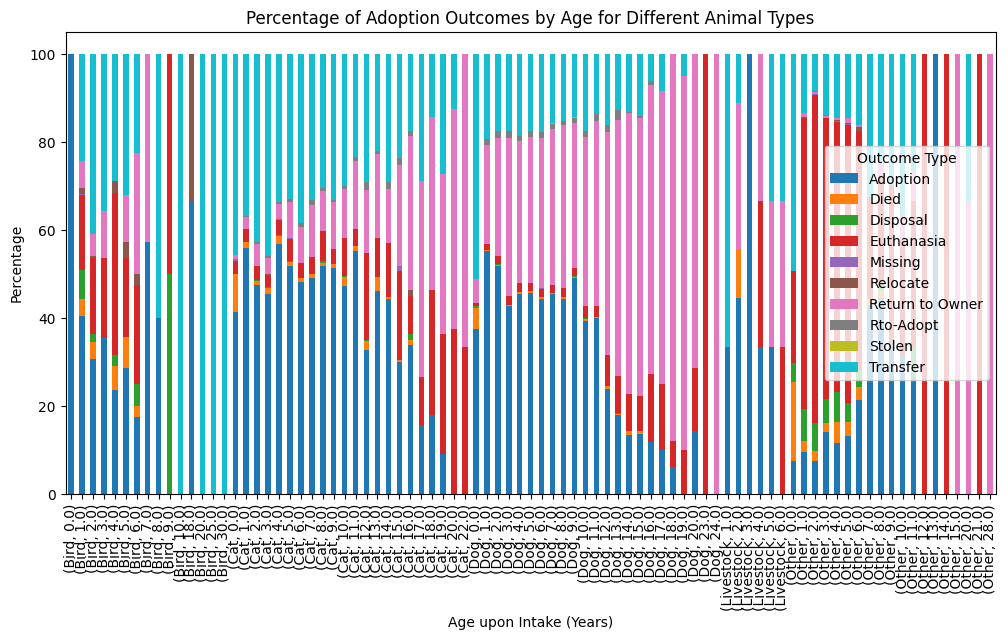

In [29]:
# Data Preparation: Convert 'Age upon Intake' to a numeric format (e.g., years)
# dataset['Age upon Intake'] = dataset['Age upon Intake'].str.extract('(\d+)').astype(float)

# Group by 'Animal Type_x', 'Age upon Intake', and 'Outcome Type' and count the occurrences
age_outcome_counts = dataset.groupby(['Animal Type_x', 'Age upon Intake', 'Outcome Type']).size().unstack().fillna(0)

# Calculate the percentage of outcome types for each age and animal type
age_outcome_percentages = age_outcome_counts.div(age_outcome_counts.sum(axis=1), axis=0) * 100

# Data Visualization: Create a stacked bar plot to visualize the percentages by age
age_outcome_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Age upon Intake (Years)')
plt.ylabel('Percentage')
plt.title('Percentage of Adoption Outcomes by Age for Different Animal Types')
plt.legend(title='Outcome Type')

# Print the numerical values
age_outcome_percentages

# plt.show()

Answer: For birds, adoption rates decrease as the age increases
For birds, euthanasia rates remain constant
For birds, general life expectancy for small birds is 2-5 years and large is 10-15 years

For cats, the chances of dying in the shelter at age zero are high
Cats coming to the shelter after age 11 have a high chance of being euthanized
Cats coming to the shelter after age 17 are generally returned to the owner

For Dog after age 11 adoption rates decrease
For Dogs to return to their owner, the

In [30]:
# Q.5 Is there a correlation between gender ('Sex upon Intake') and adoption outcomes?

from scipy.stats import chi2_contingency

# Data Preparation: Ensure 'Sex upon Intake' is properly cleaned and categorized
# Create a contingency table
contingency_table = pd.crosstab(dataset['Sex upon Intake'], dataset['Outcome Type'])

# Statistical Test: Perform a chi-squared test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Interpretation: Identify the gender with a higher frequency of adoptions
alpha = 0.05  # Significance level
if p < alpha:
    # There is a significant correlation between gender and adoption outcomes
    # Check which gender has a higher frequency of adoptions
    adoption_counts = contingency_table['Adoption']
    if adoption_counts['Neutered Male'] > adoption_counts['Spayed Female']:
        print("It is biased towards Neutered Male for Adoption.")
    elif adoption_counts['Spayed Female'] > adoption_counts['Neutered Male']:
        print("It is biased towards Spayed Female for Adoption.")
    else:
        print("There is no significant bias in adoption outcomes between genders.")
else:
    print("There is no significant correlation between gender and adoption outcomes.")


It is biased towards Neutered Male for Adoption.


In [31]:
# Q.6 Are there any specific colors that are more popular among adopters?

# Filter the dataset to exclude 'Livestock' and 'Other' from 'Animal Type_x'
filtered_data = dataset[dataset['Animal Type_x'].isin(['Bird', 'Cat', 'Dog'])]

# Filter the dataset for 'Adoption' outcome type
adoption_data = filtered_data[filtered_data['Outcome Type'] == 'Adoption']

# Group by 'Animal Type_x' and 'Color' and count the occurrences
color_counts = adoption_data.groupby(['Animal Type_x', 'Color']).size().reset_index(name='Count')

# Sort the colors within each group in descending order of count
color_counts = color_counts.sort_values(['Animal Type_x', 'Count'], ascending=[True, False])

# Select the top 5 colors for each animal type based on adoption
top_colors_by_animal_type = color_counts.groupby('Animal Type_x').head(5)

# Display the top 5 colors for each animal type
top_colors_by_animal_type

,Animal Type_x,Color,Count
50,Bird,White,21
39,Bird,Red,19
40,Bird,Red/Black,19
59,Bird,Yellow,16
8,Bird,Black/White,11
111,Cat,Brown Tabby,4971
71,Cat,Black,4140
86,Cat,Black/White,3031
124,Cat,Brown Tabby/White,2868
188,Cat,Orange Tabby,2313


In [32]:
# Filter the dataset to exclude 'Livestock' and 'Other' from 'Animal Type_x'
filtered_data = dataset[dataset['Animal Type_x'].isin(['Bird', 'Cat', 'Dog'])]

# Filter the dataset for 'Adoption' outcome type
adoption_data = filtered_data[filtered_data['Outcome Type'] == 'Return to Owner']

# Group by 'Animal Type_x' and 'Color' and count the occurrences
color_counts = adoption_data.groupby(['Animal Type_x', 'Color']).size().reset_index(name='Count')

# Sort the colors within each group in descending order of count
color_counts = color_counts.sort_values(['Animal Type_x', 'Count'], ascending=[True, False])

# Select the top 5 colors for each animal type based on adoption
top_colors_by_animal_type = color_counts.groupby('Animal Type_x').head(5)

# Display the top 5 colors for each animal type
top_colors_by_animal_type

,Animal Type_x,Color,Count
14,Bird,Green/Red,4
22,Bird,White/Black,4
26,Bird,Yellow,4
7,Bird,Buff/Brown,3
9,Bird,Gray/Red,3
29,Cat,Black,413
50,Cat,Brown Tabby,404
40,Cat,Black/White,281
54,Cat,Brown Tabby/White,271
88,Cat,Orange Tabby,262


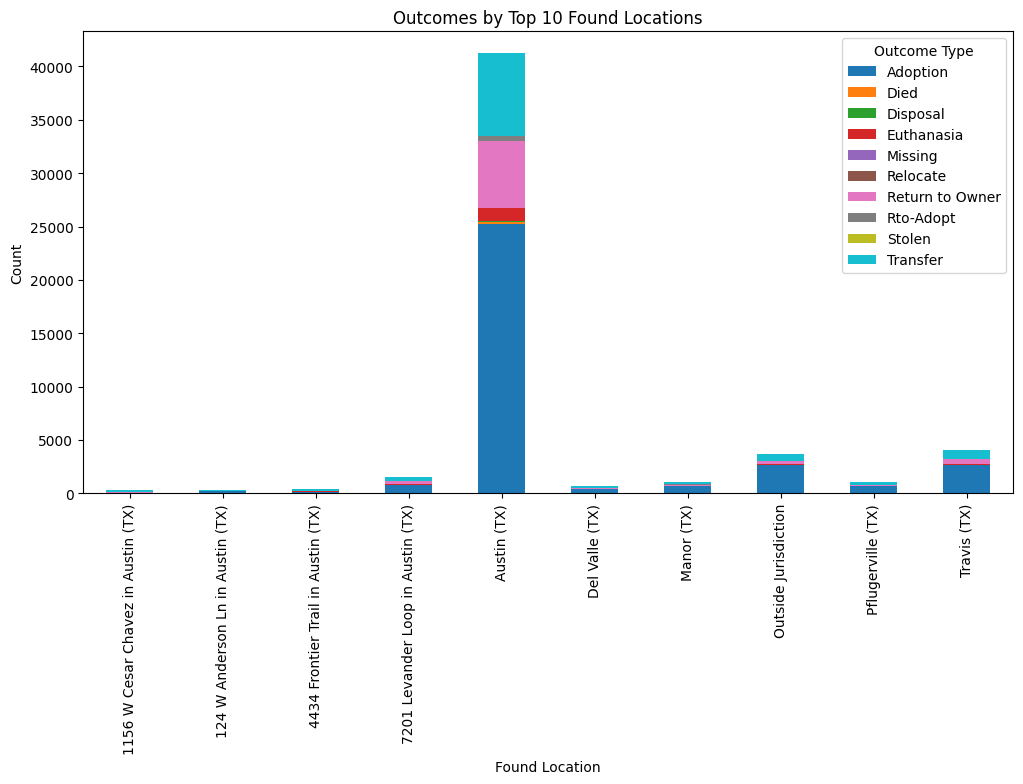

In [33]:
# Q.7 Does the 'Found Location' of animals influence their outcomes?

# Step 1: Identify the top 10 unique 'Found Locations' with the most animals
top_locations = dataset['Found Location'].value_counts().head(10).index

# Step 2: Filter the dataset to include only records with the top 10 locations
filtered_data = dataset[dataset['Found Location'].isin(top_locations)]

# Step 3: Group by 'Found Location' and 'Outcome Type' and count the occurrences
outcome_counts = filtered_data.groupby(['Found Location', 'Outcome Type']).size().unstack().fillna(0)

# Step 4: Visualize the relationship between 'Found Location' and outcomes
outcome_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Found Location')
plt.ylabel('Count')
plt.title('Outcomes by Top 10 Found Locations')
plt.legend(title='Outcome Type')
plt.show()

In [34]:
# Step 4: Calculate the percentage of outcome types for each location
outcome_percentages = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

# Print the percentage of outcome types for the top 10 locations
outcome_percentages

Outcome Type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Stolen,Transfer
Found Location,,,,,,,,,,
1156 W Cesar Chavez in Austin (TX),24.014337,0.358423,0.000000,2.150538,0.000000,0.000000,27.598566,0.716846,0.000000,45.161290
124 W Anderson Ln in Austin (TX),52.887538,0.911854,0.000000,1.215805,0.000000,0.000000,10.942249,0.303951,0.000000,33.738602
4434 Frontier Trail in Austin (TX),34.953704,3.240741,0.925926,4.861111,0.000000,0.000000,10.416667,1.620370,0.000000,43.981481
7201 Levander Loop in Austin (TX),50.349206,0.698413,0.190476,2.031746,0.000000,0.126984,17.777778,1.333333,0.000000,27.492063
Austin (TX),61.201125,0.509363,0.094596,3.046473,0.036383,0.002426,15.203260,1.059959,0.004851,18.841564
Del Valle (TX),54.705882,0.588235,0.147059,3.529412,0.000000,0.000000,12.352941,0.588235,0.000000,28.088235
Manor (TX),64.694471,0.969932,0.000000,1.551891,0.000000,0.000000,12.415131,0.872939,0.000000,19.495635
Outside Jurisdiction,72.549020,0.462963,0.027233,1.361656,0.054466,0.000000,7.271242,0.898693,0.000000,17.374728
Pflugerville (TX),63.239573,0.678952,0.000000,1.648885,0.000000,0.000000,13.579049,1.163919,0.000000,19.689622


Answer: No relation between found location and adoption

In [35]:
# Q.8 Is there a correlation between 'Intake Condition' and 'Outcome Types'?

# Create a contingency table
contingency_table = pd.crosstab(dataset['Intake Condition'], dataset['Outcome Type'])

# Statistical Test: Perform a chi-squared test of independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Interpretation: Analyze the p-value
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant correlation between Intake Condition and Outcome Types.")
else:
    print("There is no significant correlation between Intake Condition and Outcome Types.")

There is a significant correlation between Intake Condition and Outcome Types.


In [36]:
# Filter the dataset to include only 'Adoption' outcome type
adoption_data = dataset[dataset['Outcome Type'] == 'Adoption']

# Group the filtered data by both 'Intake Condition' and 'Age upon Intake' and count the occurrences
adoption_counts_by_condition_age = adoption_data.groupby(['Intake Condition', 'Age upon Intake']).size()

# Identify the most common intake condition and age combination for adoptions
most_common_condition_age_adoption = adoption_counts_by_condition_age.idxmax()
adoption_count = adoption_counts_by_condition_age.max()

# Print the most common intake condition and age combination for adoptions and the count
print(f"The most common intake condition and age combination for adoptions is '{most_common_condition_age_adoption[0]}' with '{most_common_condition_age_adoption[1]}' years, with {adoption_count} adoption outcomes.")

The most common intake condition and age combination for adoptions is 'Normal' with '1.0' years, with 26984 adoption outcomes.


In [37]:
# Filter the dataset to include only 'Euthanasia' outcome type
euthanasia_data = dataset[dataset['Outcome Type'] == 'Euthanasia']

# Group the filtered data by both 'Intake Condition' and 'Age upon Intake' and count the occurrences
euthanasia_counts_by_condition_age = euthanasia_data.groupby(['Intake Condition', 'Age upon Intake']).size()

# Identify the most common intake condition and age combination for euthanasia
most_common_condition_age = euthanasia_counts_by_condition_age.idxmax()
euthanasia_count = euthanasia_counts_by_condition_age.max()

# Print the most common intake condition and age combination for euthanasia and the count
print(f"The most common intake condition and age combination for euthanasia is '{most_common_condition_age[0]}' with '{most_common_condition_age[1]}' years, with {euthanasia_count} euthanasia outcomes.")

The most common intake condition and age combination for euthanasia is 'Normal' with '1.0' years, with 1859 euthanasia outcomes.


In [38]:
# Filter the dataset to include only 'Return to Owner' outcome type
rto_data = dataset[dataset['Outcome Type'] == 'Return to Owner']

# Group the filtered data by both 'Intake Condition' and 'Age upon Intake' and count the occurrences
rto_counts_by_condition_age = rto_data.groupby(['Intake Condition', 'Age upon Intake']).size()

# Identify the most common intake condition and age combination for return to owner
most_common_condition_age_rto = rto_counts_by_condition_age.idxmax()
rto_count = rto_counts_by_condition_age.max()

# Print the most common intake condition and age combination for return to owner and the count
print(f"The most common intake condition and age combination for return to owner is '{most_common_condition_age_rto[0]}' with '{most_common_condition_age_rto[1]}' years, with {rto_count} return to owner outcomes.")


The most common intake condition and age combination for return to owner is 'Normal' with '2.0' years, with 8368 return to owner outcomes.



How well does a logistic regression model predict adoption outcomes based on age and gender upon intake?

Why are certain breeds more likely to be adopted than others?

Which specific areas ('Found Location') where more animals are found or adopted?